In [9]:
! pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
! pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
import soundfile
import numpy as np
import librosa
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
# from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
def extract_features(file_name):
  """
  Extract the following features from .wav file 'file_name':
    MFCC, Chroma, MEL Spectrogram Frequency, Contrast, Tonnetz
  """
  with soundfile.SoundFile(file_name) as sound_file:
    X = sound_file.read(dtype="float32")
    sample_rate = sound_file.samplerate
    # stft
    stft = np.abs(librosa.stft(X))
    result = np.array([])
    # mfcc
    mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
    result = np.hstack((result, mfcc))
    # chroma
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, chroma))
    # mel
    # mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    # result = np.hstack((result, mel))
    # contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    result = np.hstack((result, contrast))
    # tonnetz
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    result = np.hstack((result, tonnetz))

  return result

In [17]:
def load_data(test_size=0.2):
  X, y = [], []
    
  counter = 0
  # sad data
  for file in glob.glob("/content/drive/MyDrive/NOR_data_all/sad/*.*"):
    if counter%200 == 0:
      print("sad counter= ", counter)
    if counter == 270:
      break
    # extract speech features
    features = extract_features(file)
    # add to data
    X.append(features)
    y.append("sad")
    counter += 1
  print("done sad")

  counter = 0
  # neutral data
  for file in glob.glob("/content/drive/MyDrive/NOR_data_all/neutral/*.*"):
    if counter%200 == 0:
      print("neutral counter= ", counter)
    if counter == 200:
      break
    # extract speech features
    features = extract_features(file)
    # add to data
    X.append(features)
    y.append("neutral")
    counter += 1
  print("done neutral")

  counter = 0
  # angry data
  for file in glob.glob("/content/drive/MyDrive/NOR_data_all/angry/*.*"):
    if counter%200 == 0:
      print("angry counter= ", counter)
    if counter == 200:
      break
    # extract speech features
    features = extract_features(file)
    # add to data
    X.append(features)
    y.append("angry")
    counter += 1
  print("done angry")
  
  counter = 0
  # disgust data
  for file in glob.glob("/content/drive/MyDrive/NOR_data_all/disgust/*.*"):
    if counter%200 == 0:
      print("disgust counter= ", counter)
    if counter == 200:
      break
    # extract speech features
    features = extract_features(file)
    # add to data
    X.append(features)
    y.append("disgust")
    counter += 1
  print("done disgust")
  counter = 0

  # fear data
  for file in glob.glob("/content/drive/MyDrive/NOR_data_all/fear/*.*"):
    if counter%200 == 0:
      print("fear counter= ", counter)
    if counter == 200:
      break
    # extract speech features
    features = extract_features(file)
    # add to data
    X.append(features)
    y.append("fear")
    counter += 1
  print("done fear")
  
  counter = 0
  # happy data
  for file in glob.glob("/content/drive/MyDrive/NOR_data_all/happy/*.*"):
    if counter%200 == 0:
      print("happy counter= ", counter)
    if counter == 200:
      break
    # extract speech features
    features = extract_features(file)
    # add to data
    X.append(features)
    y.append("happy")
    counter += 1
  print("done happy")

  # split the data to training and testing and return it
  # return(X, y)
  return train_test_split(np.array(X), y, test_size=test_size, random_state=7)

In [18]:
X_train, X_test, y_train, y_test = load_data(test_size=0.25)
# X, y = load_data()
# print some details
# number of samples in training data
# print("[+] Number of training samples:", X_train.shape[0])
# number of samples in testing data
# print("[+] Number of testing samples:", X_test.shape[0])
# number of features used
# this is a vector of features extracted 
# using utils.extract_features() method
# print("[+] Number of features:", X_train.shape[1])

sad counter=  0


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=509
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=501
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=476
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=509
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=468
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=418
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: 

sad counter=  200
done sad
neutral counter=  0


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=401
  warnings.warn(


neutral counter=  200
done neutral
angry counter=  0


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=393
  warnings.warn(


angry counter=  200
done angry
disgust counter=  0


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=317
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=334
  warnings.warn(


disgust counter=  200
done disgust
fear counter=  0


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=384
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=376
  warnings.warn(


fear counter=  200
done fear
happy counter=  0


/usr/local/lib/python3.9/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=512 is too large for input signal of length=343
  warnings.warn(


happy counter=  200
done happy


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# create model
classifier = RandomForestClassifier(n_estimators = 288, random_state = 0) 
  
# training
classifier.fit(X_train, y_train)

c_p = classifier.predict(X_test) 

print(accuracy_score(y_true=y_test,y_pred=c_p))
print(classification_report(y_test,c_p))

# creating a confusion matrix 
print(confusion_matrix(y_test,c_p) )


0.5094339622641509
              precision    recall  f1-score   support

       angry       0.57      0.62      0.59        53
     disgust       0.47      0.43      0.45        51
        fear       0.58      0.14      0.23        49
       happy       0.40      0.47      0.43        47
     neutral       0.45      0.49      0.47        49
         sad       0.58      0.78      0.67        69

    accuracy                           0.51       318
   macro avg       0.51      0.49      0.47       318
weighted avg       0.51      0.51      0.49       318

[[33  2  0 17  1  0]
 [ 4 22  0  6  9 10]
 [ 9  4  7  5  8 16]
 [11  7  0 22  4  3]
 [ 1 10  2  2 24 10]
 [ 0  2  3  3  7 54]]


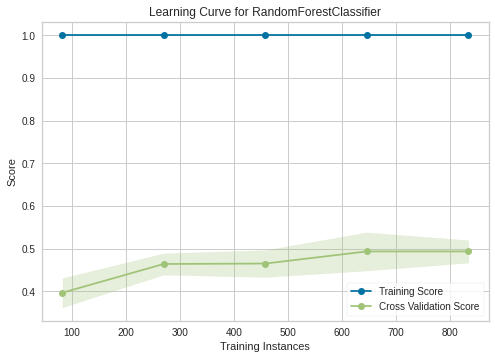

ValueError: ignored

In [38]:
# learning curve
from yellowbrick.model_selection import learning_curve

print(learning_curve(classifier, X_train, y_train, cv=8, scoring='accuracy'))
# print(learning_curve(classifier, X, y, cv=10, scoring='accuracy'))